<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio NLP + Sist. Recomendación


En este laboratorio, tabrajaras con datos de reseñas de productos para construir un sistema de recomendación que utilice procesamiento de lenguaje natural (NLP) y *machine learning*. El objetivo principal es que analices el contenido textual de las reseñas, clasifiques las opiniones en categorías (positiva, negativa o neutra) y aproveches esta información para personalizar las recomendaciones. El sistema priorizará los productos con mejores reseñas para usuarios específicos y permitirá evaluar si el análisis de sentimientos mejora la calidad de las recomendaciones. Tareas propuestas:


**Caso 1: Crear un sistema de recomendación**: Debes generar un sistema de recomendación para priorizar productos con las reseñas para cada usuario. Los pasos que deberás seguir son:    

- Estructurar el conjunto de datos

- Sistema basado en contenido


**Caso 2: Clasificar reseñas en positivas, negativas o neutras** Deberás implementar un modelo para analizar las reseñas textuales y clasificarlas en tres categorías:

- Positivas: Si el sentimiento de la reseña es favorable.

- Negativas: Si el sentimiento de la reseña es desfavorable.

- Neutras: Si la reseña no tiene un sentimiento claro.
	
- Pasos :
	- Preprocesamiento de texto: Limpiar las reseñas eliminando caracteres especiales, palabras vacías (stopwords) y realizar lematización.
	
	- Identificar las reseñas positivas, negativas y neutrales. 


Los datos los tendréis en el [siguiente enlace](https://drive.google.com/drive/u/0/folders/1vK5zESy9KElRhm_utg_lHHXuUArrwWgu) con la descipción de cada una de las columnas.  


In [34]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np



# Configuración de pandas
# --------------------------------------------

import warnings
warnings.filterwarnings('ignore')

# Para hacer visualizaciones
# -------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
# Importamos nuesto archivo cn las funciones de soporte
from src import soporte_nlp as snlp

# Caso 2: Sistema de Recomendación Basado en Popularidad

Volemos a cargar los datos iniciales.

In [37]:
df = pd.read_csv("datos/datos_agrupados.csv", index_col=0)
df.head()

,productName,mainDepartment,reviewText
0,"(Refurbished) Apple iPhone 7, 32GB, Black - Fu...",Electronics,I’ll admit I was very skeptical from reviews b...
1,AIMEILI Gel Nail Polish No Wipe Top and Base C...,Beauty and Personal Care,"It’s thick, but works good once you get used t..."
2,AKASO EK7000 4K30FPS Action Camera Ultra HD Un...,Electronics,I was not impressed with the image quality. A...
3,"ASUS Laptop L210 Ultra Thin Laptop, 11.6” HD D...",Computers,The laptop arrived just in time for school!! W...
4,"Acer Aspire 5 A515-46-R14K Slim Laptop | 15.6""...",Computers,Bought for school work. Doing good so far.Slee...


In [38]:
# Instanciamos la clase par analizar sentimientos
sentimiento = snlp.AnalisisSentimientos(df, columna_texto='reviewText')

In [39]:
# Sacamos un resumen estadístico
sentimiento.obtener_resumen()

,neg,neu,pos,compound
count,99.000000,99.000000,99.000000,99.000000
mean,0.087283,0.745101,0.167525,0.886697
std,0.021869,0.040232,0.041658,0.407872
min,0.045000,0.647000,0.045000,-0.986700
25%,0.075500,0.722000,0.143000,0.999550
50%,0.086000,0.740000,0.171000,0.999900
75%,0.096000,0.767000,0.195500,1.000000
max,0.169000,0.885000,0.266000,1.000000


In [40]:
sentimiento.dataframe


,productName,mainDepartment,reviewText,neg,neu,pos,compound
0,"(Refurbished) Apple iPhone 7, 32GB, Black - Fu...",Electronics,I’ll admit I was very skeptical from reviews b...,0.094,0.756,0.149,0.9999
1,AIMEILI Gel Nail Polish No Wipe Top and Base C...,Beauty and Personal Care,"It’s thick, but works good once you get used t...",0.066,0.702,0.232,1.0000
2,AKASO EK7000 4K30FPS Action Camera Ultra HD Un...,Electronics,I was not impressed with the image quality. A...,0.095,0.751,0.154,0.9999
3,"ASUS Laptop L210 Ultra Thin Laptop, 11.6” HD D...",Computers,The laptop arrived just in time for school!! W...,0.076,0.797,0.127,0.9996
4,"Acer Aspire 5 A515-46-R14K Slim Laptop | 15.6""...",Computers,Bought for school work. Doing good so far.Slee...,0.104,0.769,0.127,0.9997
...,...,...,...,...,...,...,...
94,adidas Men's Adilette Shower Slide,Computers,Not adjustable or comfortable. Ran too small. ...,0.095,0.708,0.196,0.9999
95,"havit HV-F2056 15.6""-17"" Laptop Cooler Cooling...",Computers,"When I received the product, one of the fans d...",0.079,0.777,0.144,1.0000
96,iJoy Matte Finish Premium Rechargeable Wireles...,Electronics,The ear pieces are not nearly as soft as they ...,0.093,0.727,0.180,0.9999
97,"livho 2 Pack Blue Light Blocking Glasses, Comp...",Computers,Got headaches with these glasses I like the an...,0.096,0.696,0.208,0.9999


In [42]:
sentimiento.dataframe['compound'].unique()

array([ 0.9999,  1.    ,  0.9996,  0.9997,  0.9678, -0.0772,  0.9995,
        0.9998,  0.9983, -0.6908, -0.6673,  0.9994,  0.9981,  0.9549,
        0.9989, -0.9867,  0.1252,  0.9992,  0.9661,  0.8219,  0.999 ,
        0.9991, -0.9224,  0.9971, -0.5174,  0.8303])

Observamos muchos valores proximos a 1, es decir, sentimientos positivos.

Sacamos visualizaciones para identificar como ha distribuido los sentimientos

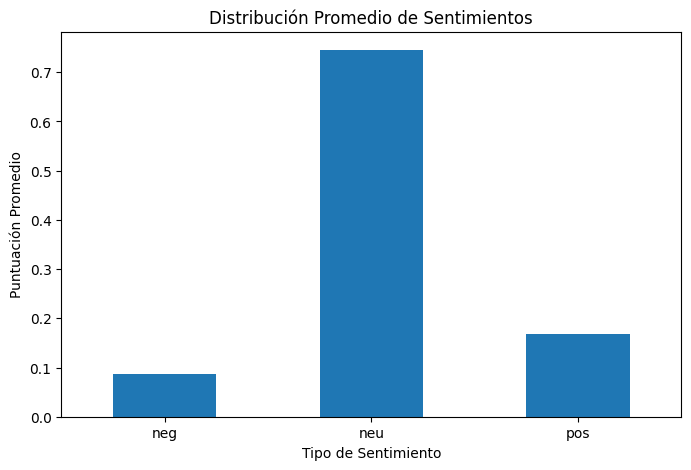

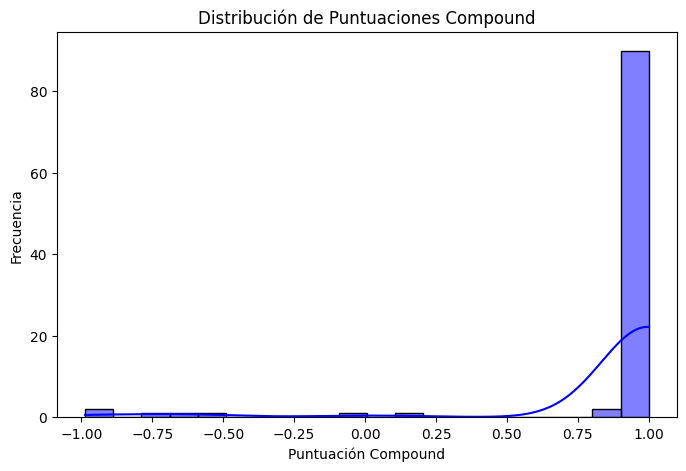

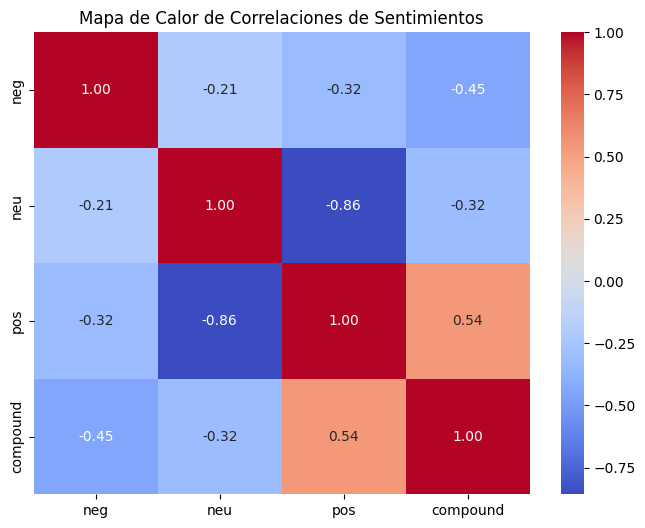

In [41]:
sentimiento.graficar_distribucion_sentimientos()
sentimiento.graficar_distribucion_compound()
sentimiento.graficar_mapa_calor_sentimientos()

Vemos que los sentimientos neutros son los que predominan. Pero hay que ctener en cuenta que está evaluando todas las palabras juntas. Por lo que este resultado puede ser por "anularse" palabras positivas y negativas.

El análisis del mapa de calor refleja las siguientes observaciones clave:

Sentimientos neutros predominantes:

Se observa que los sentimientos neutros son los más destacados. Sin embargo, este predominio podría deberse a que el análisis considera todas las palabras juntas, lo que puede "anular" los efectos de palabras positivas y negativas.
Correlaciones principales:

Cada sentimiento presenta una autocorrelación perfecta de 1 (diagonal del mapa), como es de esperarse.
Relación entre compound y los demás sentimientos:

Existe una correlación negativa entre compound y negativo (-0.45), lo que indica que a medida que compound aumenta, el sentimiento negativo disminuye.
Hay una correlación negativa leve entre compound y neutral (-0.32). Esto es esperable, ya que los sentimientos neutrales tienen menor influencia en la clasificación general.
Existe una correlación positiva moderada entre compound y positivo (0.54), lo que tiene sentido, ya que un aumento en compound suele estar asociado con mayores puntuaciones positivas.
Relación entre sentimientos positivos, negativos y neutrales:

Hay una correlación negativa alta entre sentimientos neutros y positivos (-0.86), lo que sugiere que un aumento en los sentimientos positivos tiende a excluir los sentimientos neutros.
Existe una correlación negativa leve entre sentimientos positivos y negativos (-0.32), lo cual es lógico, ya que un alto nivel de sentimiento negativo tiende a excluir un sentimiento positivo.

In [44]:
sentimiento.dataframe[['productName','compound']]

,productName,compound
0,"(Refurbished) Apple iPhone 7, 32GB, Black - Fu...",0.9999
1,AIMEILI Gel Nail Polish No Wipe Top and Base C...,1.0000
2,AKASO EK7000 4K30FPS Action Camera Ultra HD Un...,0.9999
3,"ASUS Laptop L210 Ultra Thin Laptop, 11.6” HD D...",0.9996
4,"Acer Aspire 5 A515-46-R14K Slim Laptop | 15.6""...",0.9997
...,...,...
94,adidas Men's Adilette Shower Slide,0.9999
95,"havit HV-F2056 15.6""-17"" Laptop Cooler Cooling...",1.0000
96,iJoy Matte Finish Premium Rechargeable Wireles...,0.9999
97,"livho 2 Pack Blue Light Blocking Glasses, Comp...",0.9999


In [47]:
sentimiento.dataframe['sentimiento'] = sentimiento.dataframe['compound'].apply(lambda valor: sentimiento.clasificar_sentimiento(valor))


In [48]:
sentimiento.dataframe['sentimiento'].value_counts(normalize=True)

sentimiento
positivo    0.939394
negativo    0.060606
Name: proportion, dtype: float64

Tenemos un casi un 94 % de sentimientos positivos.